#  Task 1 – Student Score Prediction (ML Internship)
- **Objective:** Predict student scores based on study hours using Linear Regression.
- **Tools Used:** Python, Pandas, Seaborn, Scikit-learn, Matplotlib


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
data.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**Missing Value Columns**
- Teacher_Quality
- Parental_Education_Level
- Distance_from_Home

# Exploratory Data Analysis - EDA

In [6]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [7]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

# Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

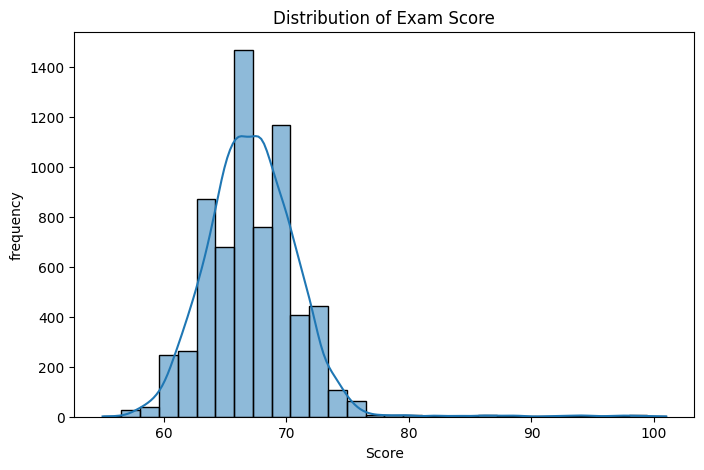

In [9]:
plt.figure(figsize = (8,5))
sns.histplot(data["Exam_Score"] , kde = True , bins = 30)
plt.title("Distribution of Exam Score")
plt.xlabel("Score")
plt.ylabel("frequency")
plt.show()

## Relationships between Features VS Target

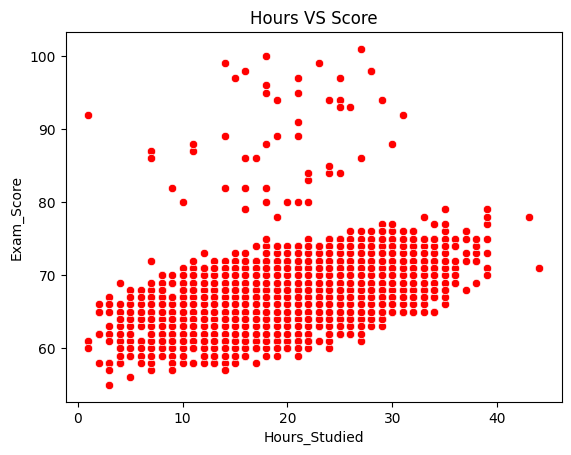

In [10]:
sns.scatterplot(data = data , x = "Hours_Studied" , y = "Exam_Score" , color = "red")
plt.title("Hours VS Score")
plt.show()

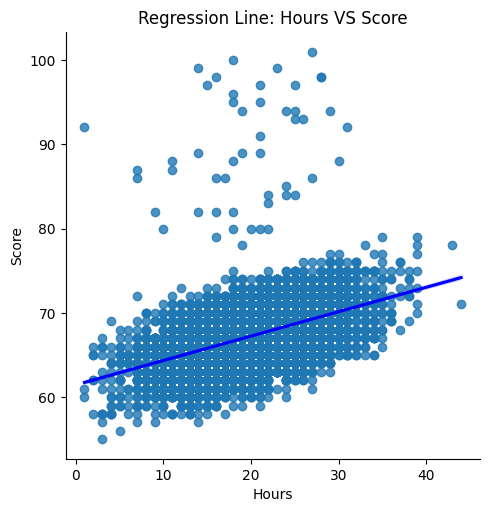

In [11]:
sns.lmplot(data = data ,  x = "Hours_Studied" , y = "Exam_Score" , line_kws = {"color":"blue"})
plt.title("Regression Line: Hours VS Score")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

## Corretaltion for Numeric Columns

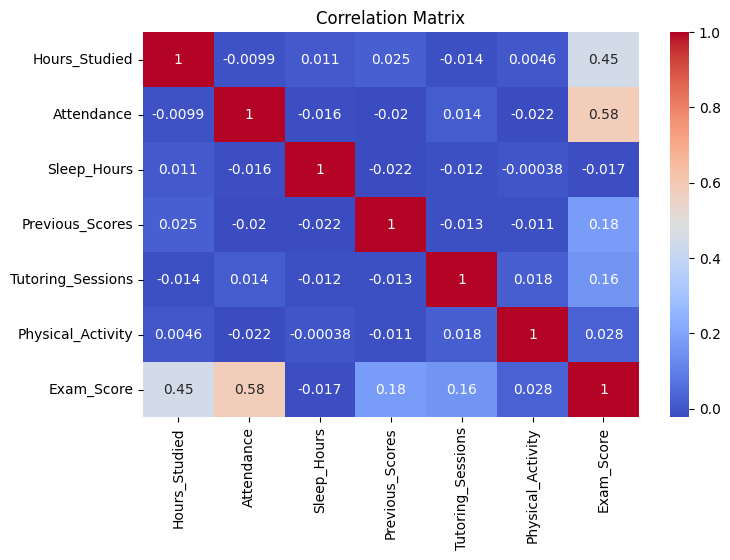

In [12]:
numeric_data = data.select_dtypes(include = ["int64", "float64"])
plt.figure(figsize = (8,5))
sns.heatmap(numeric_data.corr(), annot = True , cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Data Cleaning

In [13]:
print(data["Teacher_Quality"].mode())

0    Medium
Name: Teacher_Quality, dtype: object


In [14]:
empty_col = data.columns[data.isnull().all()]
print(empty_col)

Index([], dtype='object')


### Handling Missing Values


In [15]:
data.drop(columns= ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], inplace = True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  School_Type                 6607 non-null   object
 12  Peer_Influence              6607 non-null   object
 13  Physical_Activity           6607 non-null   int6

In [17]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
dtype: int64

## Encode Categorical Columns 

In [18]:
data.select_dtypes(include = "object").columns

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Gender'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encode = LabelEncoder()

In [21]:
for col in data.select_dtypes(include = "object").columns:
    data[col] = encode.fit_transform(data[col])

In [22]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,1,2,3,0,1,67
1,19,64,1,2,0,8,59,1,1,2,2,1,0,4,0,0,61
2,24,98,2,2,1,7,91,2,1,2,2,1,1,4,0,1,74
3,29,89,1,2,1,8,98,2,1,1,2,1,0,4,0,1,71
4,19,92,2,2,1,6,65,2,1,3,2,1,1,4,0,0,70


# Data Split Train and Test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = data.drop("Exam_Score" , axis = 1)
y = data["Exam_Score"]

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2, random_state = 42)

# Model Training

In [26]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train , y_train)

LinearRegression()

## Predictions

In [27]:
y_pred = linear_model.predict(x_test)

## Evaluate Model 

In [28]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

In [29]:
print("Mean Absolute", mae)
print("Mean Squared", mse)
print("R2 Score", r2)

Mean Absolute 1.0716115616751614
Mean Squared 4.566456846328771
R2 Score 0.6769413913488356


## Actual VS Predicted

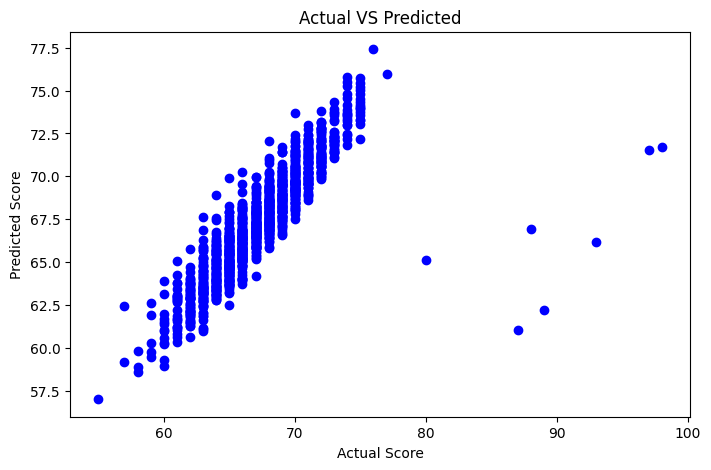

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(y_test , y_pred , color = "blue")
plt.title("Actual VS Predicted")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

# Improve Model Performance

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [32]:
poly_model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())

In [33]:
poly_model.fit(x_train , y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [34]:
poly_pred = poly_model.predict(x_test)

In [35]:
poly_mae = mean_absolute_error(y_test ,poly_pred )
poly_mse = mean_squared_error(y_test ,poly_pred )
poly_r2 = r2_score(y_test ,poly_pred )

print("Poly Mean Absolute", poly_mae)
print("Poly Mean Squared", poly_mse)
print("Poly R2 Score", poly_r2)

Poly Mean Absolute 0.7384270708842788
Poly Mean Squared 3.748180429611682
Poly R2 Score 0.7348311841515881


# Experimenting with different Features

In [36]:
x_reduce = data.drop(['Exam_Score', 'Sleep_Hours', 'Physical_Activity'] , axis = 1)
y_reduce = data["Exam_Score"]

In [37]:
x_train_r , x_test_r , y_train_r , y_test_r = train_test_split(x_reduce , y_reduce , test_size = 0.2 , random_state = 42)

In [38]:
model_reduce = LinearRegression()
model_reduce.fit(x_train_r , y_train_r)

LinearRegression()

In [39]:
y_pred_r = model_reduce.predict(x_test_r)

In [40]:
# Evaluate model
print("Mean Absolute", mean_absolute_error(y_test_r , y_pred_r))
print("Mean Squared", mean_squared_error(y_test_r , y_pred_r))
print("R2 Score", r2_score(y_test_r , y_pred_r))

Mean Absolute 1.0847330912088347
Mean Squared 4.580984647273217
R2 Score 0.6759136073758748
